In [389]:
import pandas as pd
df = pd.read_excel('dadosCovid.xlsx')

Importando o conjunto de dados

In [390]:
df.head()

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,"Se já teve Covid-19, qual foi o método usado para diagnóstico",Vacinas,Unnamed: 9,Última imunização?
0,Pessoa 1,IgG(-) IgM(-),1997-09-15 00:00:00,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-
1,Pessoa 2,IgG(+) IgM(+),2000-11-04 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-18 00:00:00
2,Pessoa 3,IgG(+) IgM(-),2002-03-07 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-31 00:00:00
3,Pessoa 4,IgG(-) IgM(-),2000-09-14 00:00:00,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-
4,Pessoa 5,IgG(-) IgM(-),1997-01-23 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 2 doses",Coronavac,2021-04-01 00:00:00


Observando a tabela, tem-se que existem alguns atributos com valores nulos e temos uma coluna sem nome.

In [391]:
df.rename(columns={'Unnamed: 9': 'Marca Vacina'}, inplace=True)
df.head()


,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,"Se já teve Covid-19, qual foi o método usado para diagnóstico",Vacinas,Marca Vacina,Última imunização?
0,Pessoa 1,IgG(-) IgM(-),1997-09-15 00:00:00,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-
1,Pessoa 2,IgG(+) IgM(+),2000-11-04 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-18 00:00:00
2,Pessoa 3,IgG(+) IgM(-),2002-03-07 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-31 00:00:00
3,Pessoa 4,IgG(-) IgM(-),2000-09-14 00:00:00,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-
4,Pessoa 5,IgG(-) IgM(-),1997-01-23 00:00:00,Feminino,NÃO,NaN,NaN,NaN,"SIM, 2 doses",Coronavac,2021-04-01 00:00:00


Como a coluna sem nome era para saber qual(is) vacina(s) a pessoa poderia ter tomado, foi renomeada para Marca Vacina.

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Nome completo                                                  194 non-null    object
 1   Teste                                                          194 non-null    object
 2   Nascimento                                                     194 non-null    object
 3   Sexo                                                           194 non-null    object
 4   Infecção                                                       194 non-null    object
 5   Há quanto tempo?                                               125 non-null    object
 6   Sintomas                                                       108 non-null    object
 7   Se já teve Covid-19, qual foi o método usado para diagnóstico  108 non-

Retomando os valores nulos e observando as variaveis da tabela, faz sentido existirem alguns valores nulos, por exemplo a Pessoa 1 Não tomou nenhuma vacina então não faz sentido ela estar associado a alguma marca de vacina. Da mesma forma quem não fez um diagnostico não faz sentido ter sintomas associados a ele.

In [393]:
df = df.rename(columns={"Se já teve Covid-19, qual foi o método usado para diagnóstico": "Diagnóstico"})



Antes de dar prosseguimento a analise, renomeando a variavel a fim de ter um nome mais compacto.

In [394]:
pessoas_sem_testagem_sem_sintomas = ((df["Diagnóstico"].isnull()) & (df["Sintomas"].isnull())).sum()

total_pessoas_sem_testagem = df["Diagnóstico"].isnull().sum()

if pessoas_sem_testagem_sem_sintomas == total_pessoas_sem_testagem:
    print("Todas as pessoas que não fizeram o teste não apresentaram sintomas.")
else:
    print("Algumas pessoas que não fizeram o teste apresentaram sintomas.")



Todas as pessoas que não fizeram o teste não apresentaram sintomas.


A saída desse teste comprova que quem não apresentou sintoma não fez o teste, logo faz sentido a existência de valores nulos.

In [395]:
contagem_sexo = df['Sexo'].value_counts()
contagem_sexo

Sexo
Feminino     135
Masculino     59
Name: count, dtype: int64

Analisando brevemente vemos que o conjunto de dados é majoritariamente feminino.

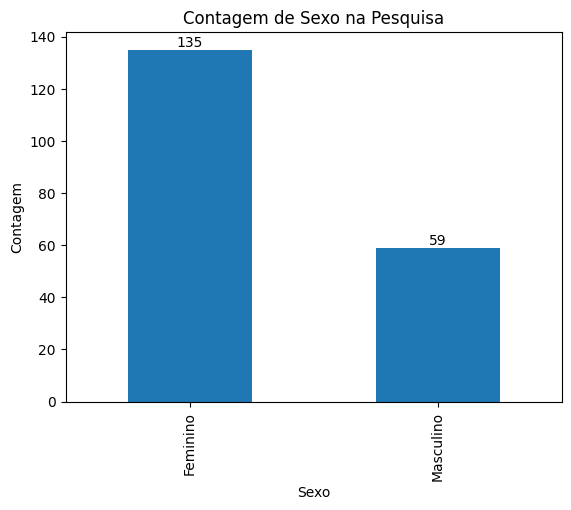

In [396]:
import matplotlib.pyplot as plt

ax = contagem_sexo.plot(kind='bar')

for i, v in enumerate(contagem_sexo):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Contagem de Sexo na Pesquisa')

plt.show()

O gráfico de barras acima representa a distribuição de sexo entre os participantes da pesquisa. Ele mostra o número de participantes de cada sexo no conjunto de dados. Os valores no eixo vertical representam a contagem de participantes, enquanto o eixo horizontal apresenta as categorias de sexo. Este gráfico fornece uma visão geral da composição de gênero dos participantes na pesquisa

Agora iremos analisar a distribuição de idade dos participantes da pesquisa.
Entretanto o formato da data é ano-mês-dia, afim de obter um valor numérico para a idade, subtrai-se o ano da pesquisa pelo ano de nascimento do participante.
Dessa forma cria-se uma nova coluna chamada Idade, que contém um valor numérico para a idade do participante.

In [397]:
import datetime
from datetime import datetime

df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%d/%m/%Y', errors='coerce')
df['Nascimento']
df.isnull().sum()

ano_atual = datetime.now().year
df['Idade'] = ano_atual - df['Nascimento'].dt.year
conta_idade = df['Idade'].value_counts()
conta_idade


Idade
21.0    32
22.0    24
25.0    22
26.0    21
24.0    20
23.0    19
20.0    18
29.0     7
19.0     6
28.0     5
27.0     3
31.0     2
0.0      2
30.0     2
36.0     1
48.0     1
34.0     1
33.0     1
35.0     1
44.0     1
42.0     1
Name: count, dtype: int64

Observa-se que existem dois individuos com idades == 0, ou seja ou há algum erro na coleta de dados ou são crianças recém nascidas.

In [398]:
idade_zero = df[df['Idade'] == 0]
idade_zero

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade
87,Pessoa 88,IgG(+) IgM(-),2023-09-11,Feminino,SIM,2021-12-01 00:00:00,"Febre, Tosse, Diarreia, Ageusia, Anosmia, Vomi...","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...","SIM, 4 doses",Astrazeneca,2022-05-01 00:00:00,0.0
158,Pessoa 159,IgG(+) IgM(-),2023-07-07,Feminino,NÃO,NaN,NaN,NaN,"SIM, 4 doses",Janssen,2022-04-01 00:00:00,0.0


Ou os dados estão incorretos, ou a imunização deles está sendo considerada pela transmissão de anticorpos da mãe para o filho durante a gestação ou amamentação.
De qualquer forma esses dados não são relevantes para a análise, então serão removidos.

In [399]:
df = df[df['Idade'] != 0]

Agora que tem-se a distribuição correta das idades, pode-se observar que a maioria dos participantes da pesquisa tem entre 20 e 40 anos.

In [400]:
media_idade = df['Idade'].mean()
media_idade

23.96276595744681

A idade média é de 24 anos aproximadamente. Ou seja é um público jovem.

https://www.medrxiv.org/content/10.1101/2020.08.07.20170043v2.full-text Analisando esse artigo, observa-se que o covid tem uma mortalidade maior para o público idoso e o público masculino. Entretanto, como o público da pesquisa é majoritariamente feminino e jovem, a mortalidade deve ser menor.

Entretanto é necessário avaliar a busca masculina pela vacinação, pois se a busca for menor, a mortalidade pode ser maior.

In [401]:
contagem_pessoas_tomaram_vacina = df['Vacinas'].value_counts()
contagem_pessoas_tomaram_vacina

Vacinas
SIM, 3 doses    75
SIM, 2 doses    55
SIM, 4 doses    44
SIM, 1 dose     11
NÃO              6
SIM, 5 doses     1
Name: count, dtype: int64

/home/pcmoraes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


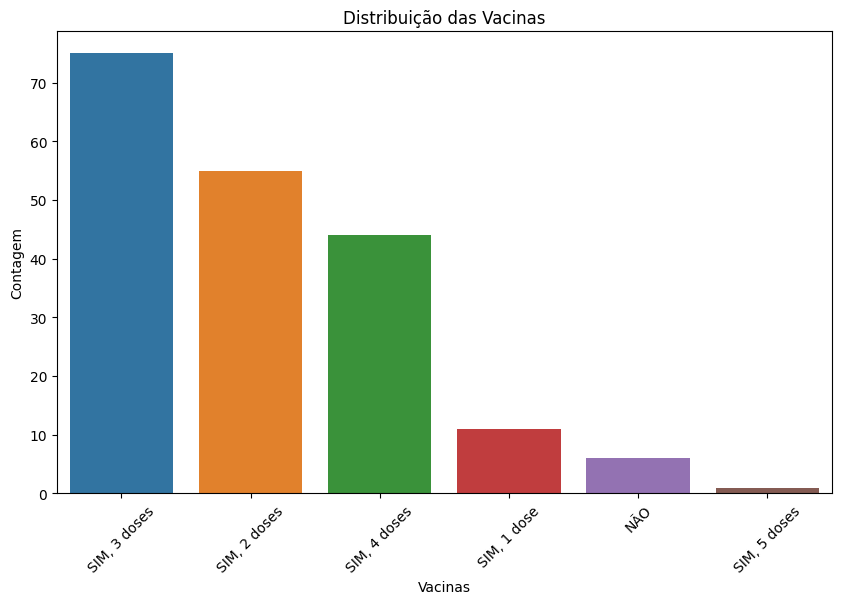

In [402]:

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Vacinas', order=df['Vacinas'].value_counts().index)
plt.xticks(rotation=45)

plt.title('Distribuição das Vacinas')
plt.xlabel('Vacinas')
plt.ylabel('Contagem')
plt.show()


Observando brevemente, temos que majoritariamente as pessoas tomaram 3 doses da vacina. No entanto temos que 6 individuos não tomaram a vacina.
Próxima etapa é verificar a quantidade de dose pela idade, em seguida verificar a quantidade ideal de doses pela idade.

In [403]:
quantidade_doses_por_idade = df.groupby(['Idade', 'Vacinas']).size().reset_index(name='Contagem')
quantidade_doses_por_idade

,Idade,Vacinas,Contagem
0,19.0,"SIM, 2 doses",3
1,19.0,"SIM, 3 doses",3
2,20.0,"SIM, 2 doses",7
3,20.0,"SIM, 3 doses",10
4,20.0,"SIM, 4 doses",1
5,21.0,"SIM, 1 dose",2
6,21.0,"SIM, 2 doses",14
7,21.0,"SIM, 3 doses",11
8,21.0,"SIM, 4 doses",5
9,22.0,"SIM, 1 dose",1


Agora uma analise para verificar qual idade tinha as pessoas que se previniram mais (3 doses) e as que se previniram menos (0 doses).

In [404]:
df['Quantidade de Doses'] = df['Vacinas'].str.extract(r'(\d+) dose', expand=False)

# Preencha os valores ausentes na nova coluna com 0, para as pessoas que não tomaram nenhuma dose
df['Quantidade de Doses'] = df['Quantidade de Doses'].fillna(0).astype(int)

#VERIFICANDO A IDADE DAS PESSOAS QUE SE PREVINIRAM MAIS (3 DOSES OU MAIS)
df[df['Quantidade de Doses'] >= 3]['Idade'].value_counts()


Idade
26.0    17
21.0    16
25.0    15
22.0    15
20.0    11
24.0    11
23.0    11
29.0     5
19.0     3
28.0     3
30.0     2
27.0     2
44.0     1
42.0     1
36.0     1
48.0     1
35.0     1
31.0     1
Name: count, dtype: int64

Observa-se que a idade que mais buscou prevenção foi a de 26 anos.

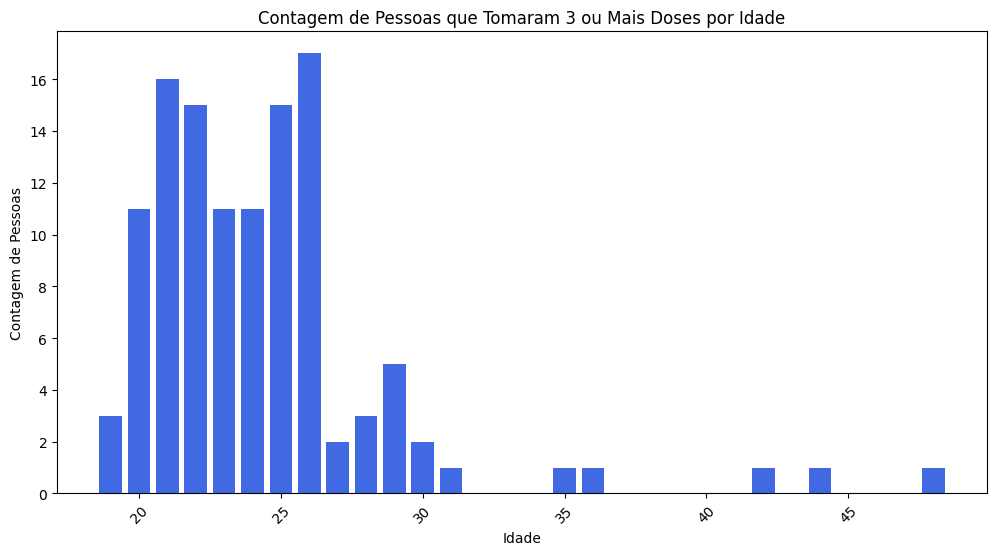

In [405]:
data = {
    'Idade': [26.0, 21.0, 25.0, 22.0, 20.0, 24.0, 23.0, 29.0, 19.0, 28.0, 30.0, 27.0, 44.0, 42.0, 36.0, 48.0, 35.0, 31.0],
    'Contagem': [17, 16, 15, 15, 11, 11, 11, 5, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1]
}

grafico = pd.DataFrame(data)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(grafico['Idade'], grafico['Contagem'], color='royalblue')
plt.xlabel('Idade')
plt.ylabel('Contagem de Pessoas')
plt.title('Contagem de Pessoas que Tomaram 3 ou Mais Doses por Idade')
plt.xticks(rotation=45)
plt.show()


Analisando o genero das pessoas que tomaram mais de 3 vacinas:

In [406]:
genero_pessoas_que_tomaram_mais_de_tres_doses = df[df['Quantidade de Doses'] >= 3]['Sexo'].value_counts()
genero_pessoas_que_tomaram_mais_de_tres_doses

Sexo
Feminino     86
Masculino    34
Name: count, dtype: int64

Observa-se que o genêro que mais buscou prevenção foi o feminino.

Agora analisando as pessoas que não tomaram nenhuma dose.

In [407]:
pessoas_que_nao_tomaram_vacina = df[df['Vacinas'] == 'NÃO']
pessoas_que_nao_tomaram_vacina

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
0,Pessoa 1,IgG(-) IgM(-),1997-09-15,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-,26.0,0
3,Pessoa 4,IgG(-) IgM(-),2000-09-14,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-,23.0,0
8,Pessoa 9,IgG(+) IgM(-),1999-07-06,Feminino,SIM,2021-05-01 00:00:00,"Febre, Tosse, Dor de garganta, Cansaço excessi...",RT-PCR (TESTE DO SWAB),NÃO,-,-,24.0,0
9,Pessoa 10,IgG(+) IgM(-),1999-01-25,Masculino,SIM,2021-07-01 00:00:00,"Ageusia, Anosmia","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...",NÃO,-,-,24.0,0
10,Pessoa 11,IgG(-) IgM(-),1999-04-30,Feminino,NÃO,NaN,NaN,NaN,NÃO,-,-,24.0,0
127,Pessoa 128,IgG(-) IgM(-),1994-10-06,Masculino,SIM,2020-07-01 00:00:00,"Febre, Tosse, Diarreia, Anosmia, Calafrios, Do...","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...",NÃO,-,-,29.0,0


In [408]:
pessoas_que_nao_tomaram_vacina['Idade'].value_counts()


Idade
24.0    3
26.0    1
23.0    1
29.0    1
Name: count, dtype: int64

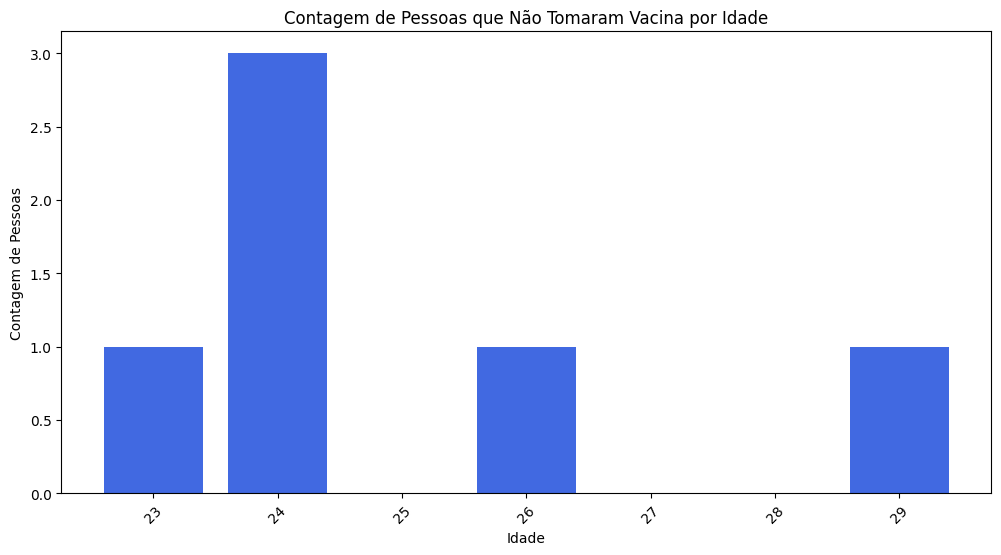

In [409]:
data = {
    'Idade': [23, 24, 26, 29],
    'Contagem': [1, 3, 1, 1]
}

grafico = pd.DataFrame(data)


plt.figure(figsize=(12, 6))
plt.bar(grafico['Idade'], grafico['Contagem'], color='royalblue')
plt.xlabel('Idade')
plt.ylabel('Contagem de Pessoas')
plt.title('Contagem de Pessoas que Não Tomaram Vacina por Idade')
plt.xticks(rotation=45)
plt.show()


Observa-se que a idade das pessoas que menos se previniram foi de 24 anos. Analisando o gênero dessas pessoas:

In [410]:
genero_pessoas_que_nao_tomaram_vacina = pessoas_que_nao_tomaram_vacina['Sexo'].value_counts()
genero_pessoas_que_nao_tomaram_vacina

Sexo
Masculino    3
Feminino     3
Name: count, dtype: int64

A proporção ficou 50% para cada gênero. O que de certo modo faz sentido, já que a base de dados é majoritariamente feminina e sabe-se que o sexo que mais buscou prevensão foi o feminino.

Agora a analise será destinada a variavel Teste

In [411]:
teste_exame = df['Teste'].value_counts()
teste_exame

Teste
IgG(+) IgM(-)    181
IgG(-) IgM(-)     10
IgG(+) IgM(+)      1
Name: count, dtype: int64

Observa-se três casos para o teste: IgG(+) IgM(-), IgG(-) IgM(-) e IgG(+) IgM(+).

IgG positivo significa que a pessoa já teve contato com o vírus e desenvolveu anticorpos contra ele.
IgM positivo significa que a pessoa está em fase de infecção.

IgG positivo e IgM negativo significa que a pessoa já teve contato com o vírus e não está em fase de infecção, entretanto essa pessoa pode transmitir o vírus para outras pessoas.

IgG negativo e IgM negativo significa que a pessoa não teve contato com o vírus e não está em fase de infecção.

IgG não é específico para o covid, ou seja, pode ser que a pessoa tenha tido contato com outro vírus e desenvolveu anticorpos contra ele.
IgM é específico para o covid, ou seja, se a pessoa tiver IgM positivo, ela está em fase de infecção.

A pessoa apresenta sintomas quando está em fase de infecção, ou seja, quando IgM é positivo.

Como tem-se apenas um caso de IgG positivo e IgM positivo, essa pessoa será analisada separadamente.

In [412]:
igg_pos_e_igm_pos = df[(df['Teste'] == 'IgG(+) IgM(+)')]
igg_pos_e_igm_pos

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
1,Pessoa 2,IgG(+) IgM(+),2000-11-04,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-18 00:00:00,23.0,1


Esse individuo é do sexo feminino, possuí 23 anos de idade e tomou apenas uma dose no ano de 2021. Entretanto como não fez um diagnóstico, não é possível avaliar os sintomas que ela apresentou

Analisando os casos de IgG(-) e IgM(-):

In [413]:
igg_neg_e_igm_neg = df[(df['Teste'] == 'IgG(-) IgM(-)')]
igg_neg_e_igm_neg

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
0,Pessoa 1,IgG(-) IgM(-),1997-09-15,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-,26.0,0
3,Pessoa 4,IgG(-) IgM(-),2000-09-14,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-,23.0,0
4,Pessoa 5,IgG(-) IgM(-),1997-01-23,Feminino,NÃO,NaN,NaN,NaN,"SIM, 2 doses",Coronavac,2021-04-01 00:00:00,26.0,2
5,Pessoa 6,IgG(-) IgM(-),1995-12-20,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-05-01 00:00:00,28.0,1
6,Pessoa 7,IgG(-) IgM(-),1998-10-24,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-01 00:00:00,25.0,1
10,Pessoa 11,IgG(-) IgM(-),1999-04-30,Feminino,NÃO,NaN,NaN,NaN,NÃO,-,-,24.0,0
11,Pessoa 12,IgG(-) IgM(-),1998-08-31,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Pfizer,2021-06-16 00:00:00,25.0,1
12,Pessoa 13,IgG(-) IgM(-),2000-05-01,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Pfizer,2021-06-30 00:00:00,23.0,1
48,Pessoa 49,IgG(-) IgM(-),2002-08-26,Feminino,SIM,2021-09-01 00:00:00,"Dor no corpo, Cansaço excessivo",RT-PCR (TESTE DO SWAB),"SIM, 3 doses",Pfizer,2022-01-14 00:00:00,21.0,3
127,Pessoa 128,IgG(-) IgM(-),1994-10-06,Masculino,SIM,2020-07-01 00:00:00,"Febre, Tosse, Diarreia, Anosmia, Calafrios, Do...","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...",NÃO,-,-,29.0,0


Tem-se dez individuos que apresentaram IgG negativo e IgM negativo. Analisando brevemente temos que 4 dos 6 individuos que não tomaram nenhuma dose da vacina apresentaram IgG negativo e IgM negativo. Entretanto, apenas dois fizeram algum tipo de diagnóstico. Analisando esses 4 individuos separadamente:

In [414]:
igg_neg_e_igm_neg_e_nao_tomaram_dose = igg_neg_e_igm_neg[igg_neg_e_igm_neg['Vacinas'] == 'NÃO']
igg_neg_e_igm_neg_e_nao_tomaram_dose

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
0,Pessoa 1,IgG(-) IgM(-),1997-09-15,Masculino,NÃO,NaN,NaN,NaN,NÃO,-,-,26.0,0
3,Pessoa 4,IgG(-) IgM(-),2000-09-14,Feminino,SIM,2022-05-01 00:00:00,"Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço...",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),NÃO,-,-,23.0,0
10,Pessoa 11,IgG(-) IgM(-),1999-04-30,Feminino,NÃO,NaN,NaN,NaN,NÃO,-,-,24.0,0
127,Pessoa 128,IgG(-) IgM(-),1994-10-06,Masculino,SIM,2020-07-01 00:00:00,"Febre, Tosse, Diarreia, Anosmia, Calafrios, Do...","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...",NÃO,-,-,29.0,0


Sabe-se que IgG(-) e IgM(-) significa que a pessoa não teve contato com o vírus e não está em fase de infecção. Entretanto, dois individuos apresentaram sintomas. Isso pode significar que elas entraram em contato com outra doença e desenvolveram anticorpos contra ela. Ou seja, não é possível afirmar que essas pessoas não tiveram contato com o vírus.

Analisando os sintomas dessas pessoas:

In [415]:
sintomas_igg_neg_igm_neg_e_nao_tomaram_vacina = igg_neg_e_igm_neg_e_nao_tomaram_dose['Sintomas'].value_counts()
sintomas_igg_neg_igm_neg_e_nao_tomaram_vacina

Sintomas
Tosse, Ageusia, Anosmia, Dor no corpo, Cansaço excessivo                                        1
Febre, Tosse, Diarreia, Anosmia, Calafrios, Dor de garganta, Dor no corpo, Cansaço excessivo    1
Name: count, dtype: int64

Os sintomas em comum foram: Anosmia, Dor no Corpo e Cansaço excessivo.
Tosse e  Dor no corpo são sintomas tipicos da gripe.
Já a Anosmia e Ageusia são sintomas tipicos do covid.


Analisando os casos de IgG(+) e IgM(-):

In [416]:
igg_pos_e_igm_neg = df[(df['Teste'] == 'IgG(+) IgM(-)')]
igg_pos_e_igm_neg

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
2,Pessoa 3,IgG(+) IgM(-),2002-03-07,Feminino,NÃO,NaN,NaN,NaN,"SIM, 1 dose",Astrazeneca,2021-07-31 00:00:00,21.0,1
7,Pessoa 8,IgG(+) IgM(-),1999-10-18,Feminino,SIM,2021-05-01 00:00:00,"Tosse, Cansaço excessivo",TESTE RAPIDO PARA PESQUISA DE AG,"SIM, 1 dose",Janssen,2021-06-01 00:00:00,24.0,1
8,Pessoa 9,IgG(+) IgM(-),1999-07-06,Feminino,SIM,2021-05-01 00:00:00,"Febre, Tosse, Dor de garganta, Cansaço excessi...",RT-PCR (TESTE DO SWAB),NÃO,-,-,24.0,0
9,Pessoa 10,IgG(+) IgM(-),1999-01-25,Masculino,SIM,2021-07-01 00:00:00,"Ageusia, Anosmia","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...",NÃO,-,-,24.0,0
13,Pessoa 14,IgG(+) IgM(-),2002-11-08,Feminino,SIM,2022-09-01 00:00:00,"Tosse, Dor no corpo",RT-PCR (TESTE DO SWAB),"SIM, 3 doses",Pfizer,2021-09-01 00:00:00,21.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Pessoa 190,IgG(+) IgM(-),NaT,Feminino,SIM,2023-12-20 00:00:00,"Tosse,anosmia, do de garganta, casaço,dispneia",RT-PCR (TESTE DO SWAB) / TESTE RÁPIDO PARA PES...,"SIM, 4 doses","Astrazeneca, Coronavac, Pzifer e Janssen",2023-07-01 00:00:00,NaN,4
190,Pessoa 191,IgG(+) IgM(-),2002-06-19,Feminino,SIM,2022-07-13 00:00:00,"Febre,tosse,calafrio",RT-PCR (TESTE DO SWAB) / TESTE RÁPIDO PARA PES...,"SIM, 2 doses","Astrzeneca,Pfizer",2021-02-01 00:00:00,21.0,2
191,Pessoa 192,IgG(+) IgM(-),NaT,Masculino,NÃO,NaN,NaN,NaN,"SIM, 3 doses","Pfizer,Coronavac",2023-04-01 00:00:00,NaN,3
192,Pessoa 193,IgG(+) IgM(-),2002-10-18,Masculino,NÃO,NaN,NaN,NaN,"SIM, 3 doses","Astrazeneca,Pfizer",2022-06-01 00:00:00,21.0,3


Sabe-se que IgG(+) e IgM(-) significa que a pessoa já teve contato com o vírus e não está em fase de infecção, entretanto ela pode transmitir o vírus para outras pessoas.

Tem-se uma boa quantidade de individuos para esse caso, além de que boa parte deles fizeram algum tipo de diagnóstico.

Analisando os sintomas dessas pessoas:


In [417]:
igg_pos_e_igm_neg_sintomas = igg_pos_e_igm_neg['Sintomas'].value_counts()
igg_pos_e_igm_neg_sintomas

Sintomas
Assintomático                                                                                                                           16
Tosse, Dor de garganta                                                                                                                   3
Tosse, Dor no corpo                                                                                                                      3
Febre, Tosse, Calafrios, Dor de garganta, Dor no corpo, Cansaço excessivo                                                                3
Ageusia, Anosmia                                                                                                                         2
                                                                                                                                        ..
Tosse, Dor de garganta, Cansaço excessivo, Dificuldade de respirar, Dor ou pressão no peito, Dor na região da face, como de sinusite     1
Febre, Tosse, Dor 

De cara ve-se que 16 individuos foram assintomaticos, ou seja não apresentaram nenhum sintomas. Em seguida tem-se Tosse, Dor de garganta e Dor no corpo como sintomas mais comuns. Esses sintomas são tipicos da gripe, entretanto também podem ser sintomas do covid.

Analisando os Assintomaticos:

In [418]:
assintomaticos_igg_pos_e_igm_neg = igg_pos_e_igm_neg[igg_pos_e_igm_neg['Sintomas'] == 'Assintomático']
assintomaticos_igg_pos_e_igm_neg

,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
34,Pessoa 35,IgG(+) IgM(-),2000-07-14,Masculino,SIM,2021-11-01 00:00:00,Assintomático,"RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...","SIM, 2 doses",Astrazeneca,2022-03-01 00:00:00,23.0,2
38,Pessoa 39,IgG(+) IgM(-),1999-10-04,Feminino,SIM,2021-12-01 00:00:00,Assintomático,RT-PCR (TESTE DO SWAB),"SIM, 2 doses",Pfizer,2022-06-01 00:00:00,24.0,2
44,Pessoa 45,IgG(+) IgM(-),2002-04-13,Feminino,SIM,2021-12-01 00:00:00,Assintomático,RT-PCR (TESTE DO SWAB),"SIM, 4 doses",Astrazeneca,2022-07-01 00:00:00,21.0,4
51,Pessoa 52,IgG(+) IgM(-),1999-05-06,Masculino,SIM,2020-11-01 00:00:00,Assintomático,TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),"SIM, 2 doses",Pfizer,2021-09-01 00:00:00,24.0,2
55,Pessoa 56,IgG(+) IgM(-),1997-03-14,Feminino,SIM,2021-07-01 00:00:00,Assintomático,RT-PCR (TESTE DO SWAB),"SIM, 4 doses",Pfizer,2023-04-01 00:00:00,26.0,4
62,Pessoa 63,IgG(+) IgM(-),2002-04-26,Masculino,SIM,2022-01-01 00:00:00,Assintomático,TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),"SIM, 2 doses",Astrazeneca,2023-01-01 00:00:00,21.0,2
71,Pessoa 72,IgG(+) IgM(-),1990-12-26,Feminino,SIM,2021-09-01 00:00:00,Assintomático,TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),"SIM, 2 doses",Pfizer,2022-03-04 00:00:00,33.0,2
99,Pessoa 100,IgG(+) IgM(-),2004-03-06,Feminino,SIM,2023-02-06 00:00:00,Assintomático,"RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...","SIM, 2 doses",Pfizer,2022-03-01 00:00:00,19.0,2
101,Pessoa 102,IgG(+) IgM(-),2002-06-12,Masculino,SIM,2022-01-01 00:00:00,Assintomático,RT-PCR (TESTE DO SWAB),"SIM, 2 doses",Pfizer,2021-11-01 00:00:00,21.0,2
104,Pessoa 105,IgG(+) IgM(-),1997-08-18,Masculino,SIM,2021-01-01 00:00:00,Assintomático,RT-PCR (TESTE DO SWAB),"SIM, 4 doses",Pfizer,2023-02-01 00:00:00,26.0,4


Analisando a quantidade de doses da vacina que essas pessoas tomaram:

In [419]:
doses_igg_pos_igm_neg_para_assintomaticos = assintomaticos_igg_pos_e_igm_neg['Vacinas'].value_counts()
print('Doses para assintomáticos: \n', doses_igg_pos_igm_neg_para_assintomaticos, '\nMédia de doses para assintomáticos: ', round(doses_igg_pos_igm_neg_para_assintomaticos.mean(), 1))

Doses para assintomáticos: 
 Vacinas
SIM, 2 doses    8
SIM, 4 doses    6
SIM, 3 doses    2
Name: count, dtype: int64 
Média de doses para assintomáticos:  5.3


Observa-se que esses individuos buscaram a prevenção, pois tomaram em média 5.3 doses da vacina.

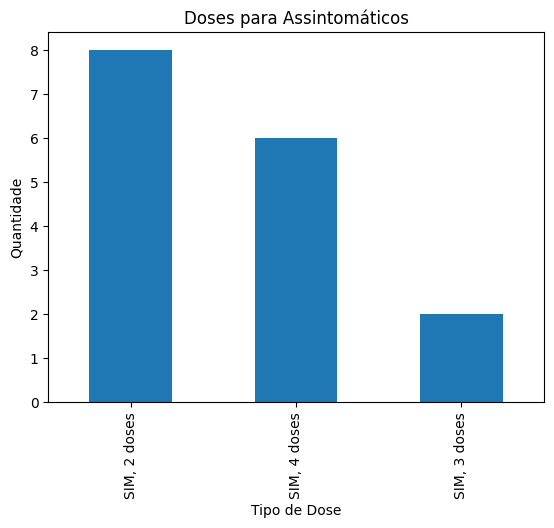

In [420]:
doses_igg_pos_igm_neg_para_assintomaticos.plot(kind='bar')

plt.xlabel('Tipo de Dose')
plt.ylabel('Quantidade')
plt.title('Doses para Assintomáticos')

plt.show()

Retornando a analise dos IgG(+) e IgM(-), analisando agora os sintomas dos individuos que apresentaram algum sintoma:

In [421]:
igg_pos_e_igm_neg_sintomas

Sintomas
Assintomático                                                                                                                           16
Tosse, Dor de garganta                                                                                                                   3
Tosse, Dor no corpo                                                                                                                      3
Febre, Tosse, Calafrios, Dor de garganta, Dor no corpo, Cansaço excessivo                                                                3
Ageusia, Anosmia                                                                                                                         2
                                                                                                                                        ..
Tosse, Dor de garganta, Cansaço excessivo, Dificuldade de respirar, Dor ou pressão no peito, Dor na região da face, como de sinusite     1
Febre, Tosse, Dor 

Os sintomas mais comuns foram: Tosse, Dor de garganta e Dor no corpo. Esses sintomas são tipicos da gripe, entretanto também podem ser sintomas do covid.
Sabe-se que os sintomas tipicos da covid são: Tosse, Dor de garganta, Dor no corpo, Anosmia e Ageusia.

De acordo com https://drauziovarella.uol.com.br/coronavirus/covid-19-conheca-os-principais-sintomas-de-cada-variante/#:~:text=De%20forma%20geral%2C%20os%20sintomas,febre%2C%20tosse%20seca%20e%20cansa%C3%A7o. Os sintomas comuns são: febre, tosse seca e cansaço. Podem ocorrer ainda perda de olfato e paladar, dor de cabeça, garganta inflamada, olhos vermelhos ou irritados, diarreia, entre outros. Nos casos mais graves, há dificuldade para respirar, confusão mental, dor no peito e perda de fala ou mobilidade. Analisando individualmente esses sintomas:

In [422]:
sintomas_igg_pos_e_igm_neg = igg_pos_e_igm_neg['Sintomas'].value_counts()
sintomas_igg_pos_e_igm_neg = sintomas_igg_pos_e_igm_neg.drop('Assintomático')
sintomas_covid = ['Tosse', 'Febre', 'Cansaço', 'Ageusia', 'Anosmia', 'Dor de Garganta', 'Dor no Corpo', 'Diarreia', 'Dor de Cabeça', 'Dificuldade de Respirar']

# Verifique se os sintomas da coluna "Sintomas" contêm algum dos sintomas da lista "sintomas_covid"
sintomas_igg_pos_e_igm_neg = igg_pos_e_igm_neg[igg_pos_e_igm_neg['Sintomas'].fillna('').str.contains('|'.join(sintomas_covid))]

# Agora você tem apenas as linhas que contêm pelo menos um dos sintomas desejados
display(sintomas_igg_pos_e_igm_neg)


,Nome completo,Teste,Nascimento,Sexo,Infecção,Há quanto tempo?,Sintomas,Diagnóstico,Vacinas,Marca Vacina,Última imunização?,Idade,Quantidade de Doses
7,Pessoa 8,IgG(+) IgM(-),1999-10-18,Feminino,SIM,2021-05-01 00:00:00,"Tosse, Cansaço excessivo",TESTE RAPIDO PARA PESQUISA DE AG,"SIM, 1 dose",Janssen,2021-06-01 00:00:00,24.0,1
8,Pessoa 9,IgG(+) IgM(-),1999-07-06,Feminino,SIM,2021-05-01 00:00:00,"Febre, Tosse, Dor de garganta, Cansaço excessi...",RT-PCR (TESTE DO SWAB),NÃO,-,-,24.0,0
9,Pessoa 10,IgG(+) IgM(-),1999-01-25,Masculino,SIM,2021-07-01 00:00:00,"Ageusia, Anosmia","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...",NÃO,-,-,24.0,0
13,Pessoa 14,IgG(+) IgM(-),2002-11-08,Feminino,SIM,2022-09-01 00:00:00,"Tosse, Dor no corpo",RT-PCR (TESTE DO SWAB),"SIM, 3 doses",Pfizer,2021-09-01 00:00:00,21.0,3
14,Pessoa 15,IgG(+) IgM(-),2002-05-16,Masculino,SIM,2021-05-01 00:00:00,"Febre, Calafrios","RT-PCR (TESTE DO SWAB), TESTE RAPIDO PARA PESQ...","SIM, 3 doses",Pfizer,2021-11-01 00:00:00,21.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Pessoa 183,IgG(+) IgM(-),2001-12-29,Masculino,SIM,2021-04-01 00:00:00,"Febre,tosse,cansaço excessivo",RT-PCR (TESTE DO SWAB) / TESTE RÁPIDO PARA PES...,"SIM, 2 doses",Coronavac,2021-08-01 00:00:00,22.0,2
185,Pessoa 186,IgG(+) IgM(-),2004-05-11,Masculino,SIM,2021-05-01 00:00:00,Tosse,TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),"SIM, 3 doses","Coronavac,Pfizer",2022-07-01 00:00:00,19.0,3
186,Pessoa 187,IgG(+) IgM(-),2001-11-20,Masculino,SIM,2023-12-22 00:00:00,"Febre,cansaço,dor de garganta,calafrio",TESTE RAPIDO PARA PESQUISA DE AG (TESTE DO SWAB),"SIM, 2 doses",Pfizer,2022-06-01 00:00:00,22.0,2
189,Pessoa 190,IgG(+) IgM(-),NaT,Feminino,SIM,2023-12-20 00:00:00,"Tosse,anosmia, do de garganta, casaço,dispneia",RT-PCR (TESTE DO SWAB) / TESTE RÁPIDO PARA PES...,"SIM, 4 doses","Astrazeneca, Coronavac, Pzifer e Janssen",2023-07-01 00:00:00,NaN,4


Uma quantidade consideravel de individuos apresentaram os sintomas tipicos do covid, além disso quando o IgG é positivo e o IgM é negativo, a pessoa está na fase ativa da doença, ou seja, ela pode transmitir o vírus para outras pessoas.

## Conclusão:

A pesquisa foi realizada com 194 pessoas, sendo os individuos majoritariamente do genero feminino e com idade média de 24 anos.

A maioria dos participantes tomaram 3 doses da vacina, entretanto 6 individuos não tomaram nenhuma dose.

A idade que mais buscou prevenção foi a de 26 anos e o genêro que mais buscou prevenção foi o feminino.

A idade das pessoas que menos se previniram foi de 24 anos e a proporção de gênero foi 50% para cada gênero.

Alguns participantes não apresentaram sintomas, entretanto os sintomas mais comuns foram: Tosse, Dor de garganta e Dor no corpo. Esses sintomas são tipicos da gripe, entretanto também podem ser sintomas do covid.

Uma quantidade consideravel de individuos apresentaram os sintomas tipicos do covid, além disso quando o IgG é positivo e o IgM é negativo, a pessoa está na fase ativa da doença, ou seja, ela pode transmitir o vírus para outras pessoas.

Esperava-se encontrar individuos mais velhos que se negaram a tomar a vacina, devido a um conservadorismo maior. Entretanto, a idade média dos participantes foi de 24 anos, ou seja, um público jovem. Além disso, a maioria dos participantes tomaram 3 doses da vacina, o que mostra que a maioria buscou a prevenção.

